# Non-Negative Matrix Factorization With NBA Shot Patterns

Any NBA player can be classified into one of three traditional positions: a guard, a forward, or a center. This usually depends on his height and body type. Typically these groups of players share some similarities in shooting styles, but different playing styles at each position create ample subsets of player styles within each position. Some players are known only to shoot three pointers, some players may be unskilled in shooting and take advantage of their size and strength to score directly at the basket, and others may use their versatility to score from all parts of the court. Sports analytics is a booming field, particularly in the NBA, and analyzing shot patterns is a great way to distinguish between players.

Here we will approximate the frequencies of locations of shot attempts for each NBA player during the 2016-2017 regular season using Non-Negative Matrix Factorization (NMF). This consists of creating $r$ bases vectors (chosen at different increments) which generalize the shot location densities of all players, then for each player assigning a vector of appropriate weights tied to each bases vector. Using this, we can visualize the tendencies of shot types for any player, and furthermore analyze possible similarities between players.

### Importing modules and data
We previously created a matrix $X$ that contains the actual shot attempt densities for each player. This matrix is of size ${p\times n}$ where $p$ is the number of "bins" in our discretized court (resembling the location of each shot), and $n$ is 362, which is the number of players considered for our data. This matrix is saved in a pickle file under the name `allpatterns2016-2017`, and we will load it to our notebook. 

In [1]:
# Import modules
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import subprocess as sp
import pickle
from IPython.core.pylabtools import figsize

import helper_basketball as h
import imp
imp.reload(h);

In [2]:
X = pickle.load(open('allpatterns2016-17.pkl', 'rb'))
X.shape

(15750, 362)

We see that $X$ is of size 15750 $\times$ 362 corresponding to ${p \times n}$. For future reference, we will import the player IDs associated to each column in the $X$ matrix (rather than reconstruct the entire data).

In [3]:
player_ids = [1713,    1717,    1891,    1938,    2037,    2199,    2200,
              2207,    2210,    2216,    2225,    2399,    2403,    2440,
              2544,    2546,    2548,    2561,    2564,    2571,    2585,
              2594,    2730,    2733,    2734,    2736,    2738,    2743,
              2744,    2747,    2749,    2754,    2757,    2772,  101107,
            101108,  101109,  101112,  101114,  101123,  101133,  101135,
            101138,  101139,  101141,  101145,  101150,  101161,  101162,
            101181,  200746,  200751,  200752,  200755,  200757,  200765,
            200768,  200771,  200782,  200794,  200826,  201142,  201143,
            201144,  201145,  201147,  201148,  201149,  201150,  201152,
            201156,  201158,  201160,  201162,  201163,  201166,  201167,
            201188,  201196,  201228,  201563,  201565,  201566,  201567,
            201568,  201569,  201571,  201572,  201575,  201577,  201578,
            201579,  201580,  201582,  201583,  201584,  201585,  201586,
            201587,  201588,  201589,  201599,  201601,  201609,  201627,
            201933,  201935,  201936,  201937,  201939,  201942,  201943,
            201945,  201949,  201950,  201951,  201952,  201954,  201956,
            201959,  201960,  201961,  201967,  201973,  201975,  201976,
            201980,  201988,  202066,  202083,  202322,  202323,  202324,
            202325,  202326,  202328,  202329,  202330,  202331,  202334,
            202335,  202337,  202338,  202339,  202340,  202344,  202348,
            202355,  202357,  202362,  202389,  202391,  202397,  202498,
            202681,  202682,  202683,  202684,  202685,  202687,  202688,
            202689,  202691,  202692,  202693,  202694,  202695,  202696,
            202697,  202699,  202700,  202702,  202703,  202704,  202709,
            202710,  202711,  202714,  202718,  202720,  202722,  202730,
            202732,  202734,  202738,  203076,  203077,  203078,  203079,
            203080,  203081,  203082,  203083,  203084,  203085,  203086,
            203087,  203089,  203090,  203092,  203095,  203107,  203109,
            203110,  203112,  203114,  203115,  203120,  203124,  203141,
            203145,  203186,  203200,  203210,  203382,  203457,  203458,
            203459,  203460,  203463,  203468,  203469,  203471,  203473,
            203476,  203477,  203481,  203482,  203484,  203486,  203487,
            203488,  203490,  203493,  203496,  203497,  203498,  203500,
            203501,  203503,  203504,  203506,  203507,  203512,  203516,
            203518,  203521,  203524,  203530,  203546,  203552,  203584,
            203585,  203613,  203894,  203897,  203898,  203901,  203902,
            203903,  203909,  203914,  203915,  203917,  203918,  203922,
            203924,  203925,  203926,  203930,  203932,  203933,  203935,
            203937,  203939,  203943,  203944,  203949,  203952,  203953,
            203954,  203957,  203967,  203991,  203994,  203999,  204001,
            204020,  204025,  204028,  204038,  204060,  204456, 1626143,
           1626144, 1626145, 1626147, 1626149, 1626150, 1626155, 1626156,
           1626157, 1626158, 1626159, 1626161, 1626162, 1626163, 1626164,
           1626166, 1626167, 1626168, 1626169, 1626170, 1626171, 1626172,
           1626173, 1626178, 1626179, 1626181, 1626185, 1626195, 1626196,
           1626204, 1626209, 1626210, 1626245, 1626246, 1626257, 1627098,
           1627733, 1627734, 1627737, 1627739, 1627741, 1627742, 1627746,
           1627747, 1627748, 1627750, 1627751, 1627752, 1627755, 1627756,
           1627758, 1627759, 1627763, 1627770, 1627775, 1627783, 1627785,
           1627786, 1627789, 1627812, 1627823, 1627826, 1627827, 1627834,
           1627835, 1627848, 1627851, 1627852, 1627884]

## Problem 1

### Visualizing different values of $r$
First, we define a function that allows us to use the `sklearn` package to solve for W and H depending on the amount of bases vectors we are interested in.

In [4]:
def non_negative_marix_decomp(n_components,train_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(train_data)
    H = model.components_
    nmf = (W,H)
    return(nmf)

We must also define the locations of each partition for the X and Y axes which were used to construct our $X$ matrix, but we will also be using to plot our results.

In [5]:
xedges = (np.linspace(start=-25, stop=25, num=151, dtype=np.float)) * 12 ## Partitioning the X coordinates
yedges = (np.linspace(start= -4, stop=31, num=106, dtype=np.float)) * 12 ## Partitioning the Y coordinates

Now we can visually compare the differences between various numbers of bases vectors by changing the value of `n_components` that is passed into the `non_negative_matrix_decomp` function. 

##### Three bases vectors:

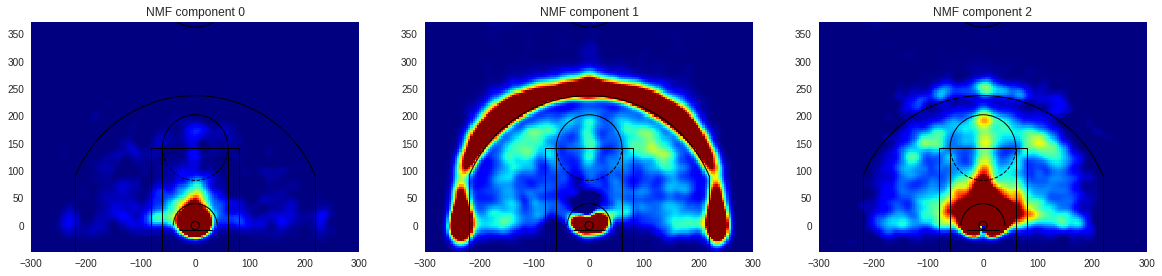

In [6]:
W_3,H_3 = non_negative_marix_decomp(n_components = 3,train_data = X)

fig, ax = plt.subplots(1, 3, figsize=(20,40))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_3[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

With three bases vectors we can see three distinct groups: short-range only, three-point heavy with short-range, and short-to-midrange. It would be very difficult to describe a three point shooter who doesn't have many close-range shots, so we can see that three bases vectors is definitely too few.

###### Six bases vectors:

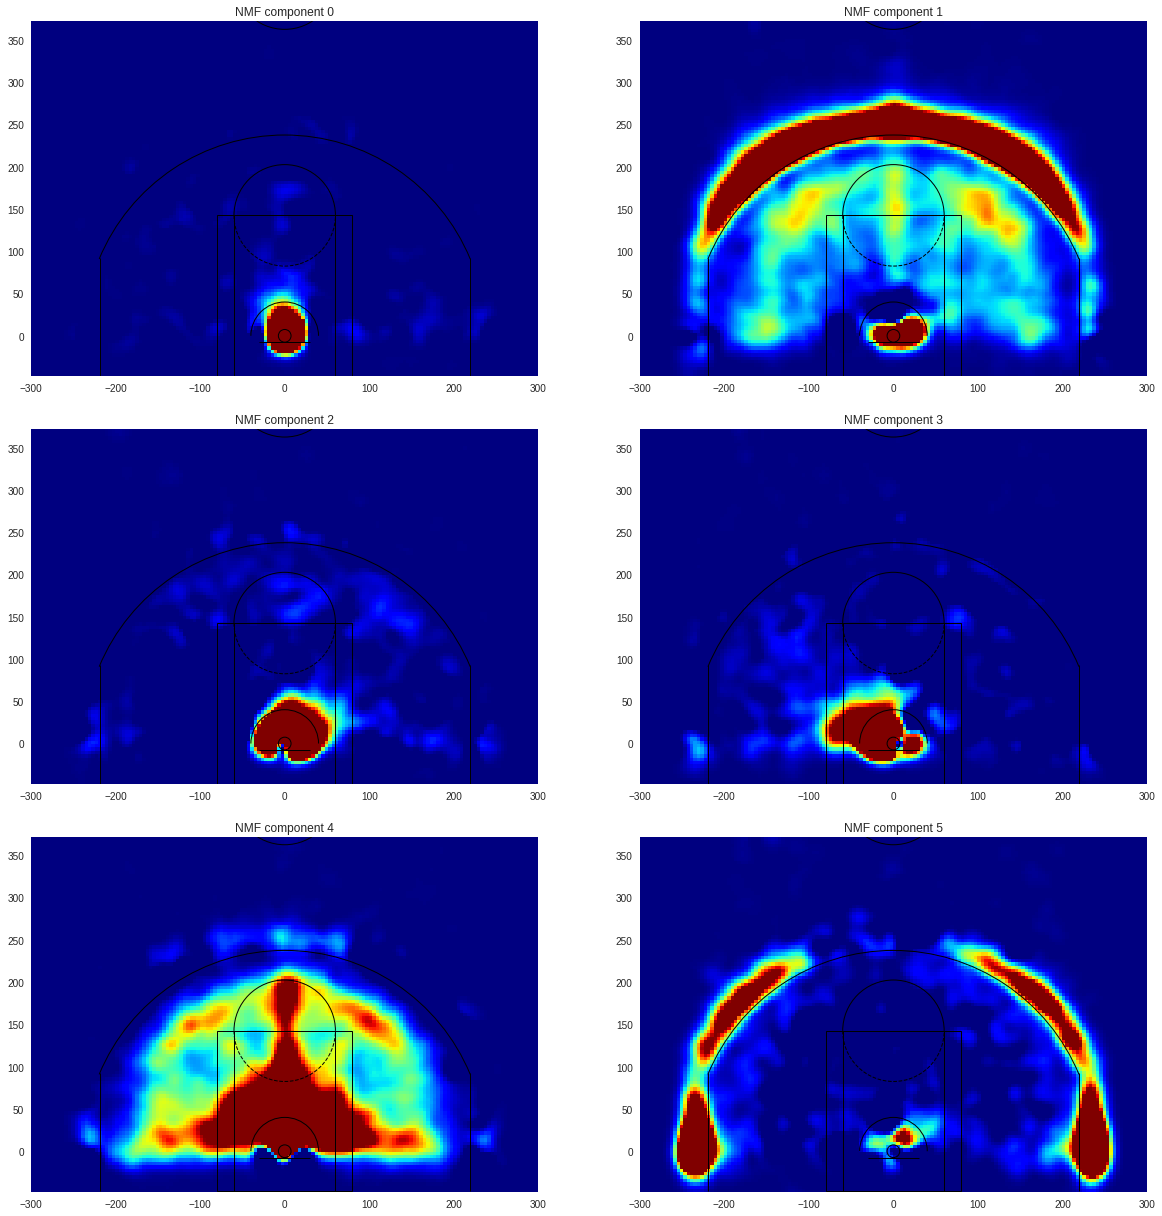

In [7]:
W_6,H_6 = non_negative_marix_decomp(n_components = 6,train_data = X)
fig, ax = plt.subplots(3, 2, figsize=(20,40))
fig.subplots_adjust(hspace=-.7)

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_6[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

Six bases vectors looks much better, with some variation among different ranges. The three point range is now separated mostly into two groups, one for the top of the key and one on the sides. And, as a higher proportion of shots are taken near the basket, there are now three distinct groups just for close-range shots. It may be reasonable to stop here, but perhaps the longer range shots wouldn't be described in enough detail.

##### Twelve bases vectors:

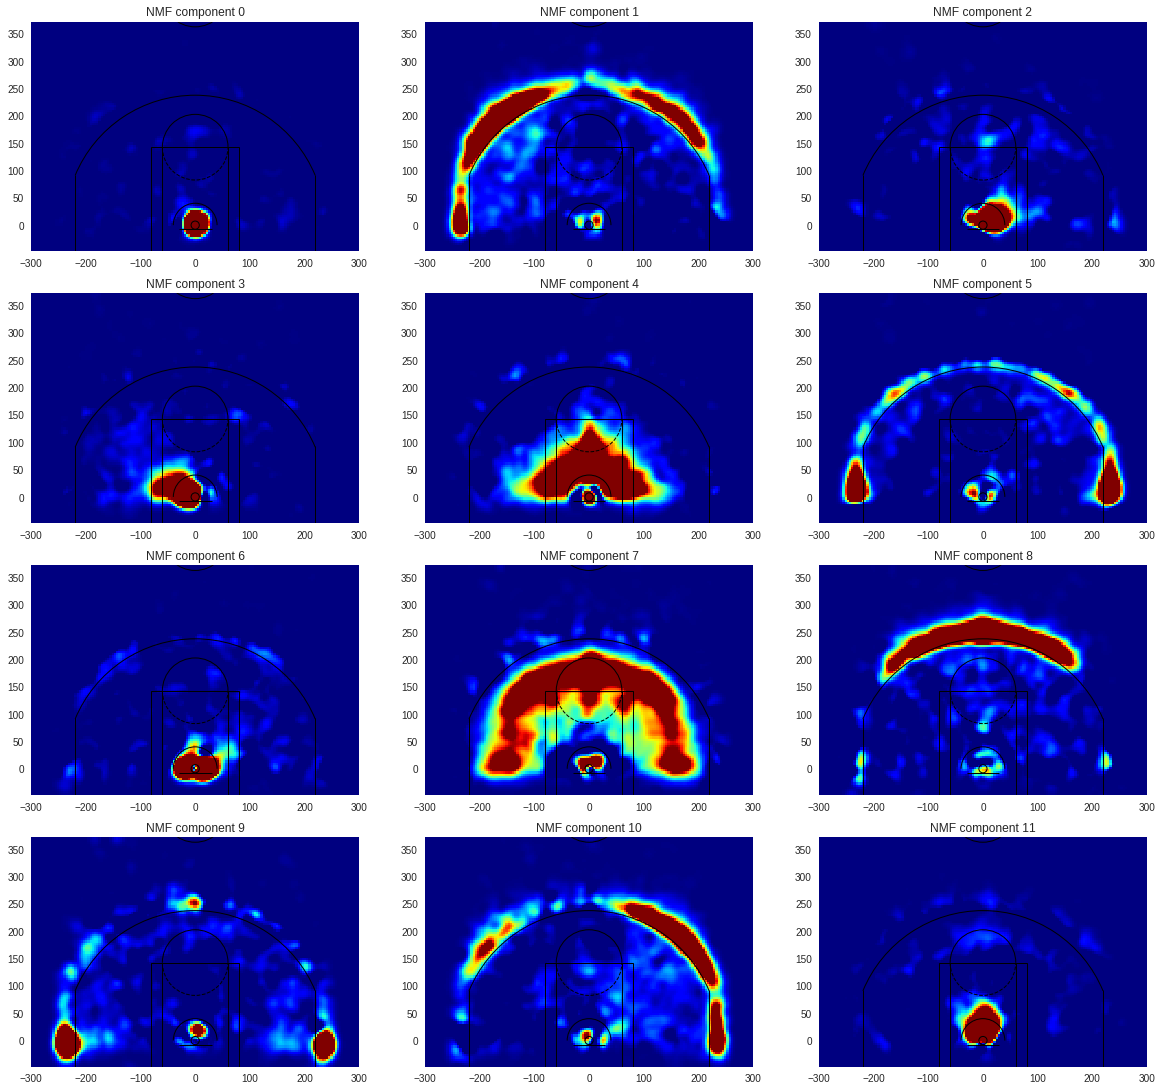

In [8]:
W_12,H_12 = non_negative_marix_decomp(n_components = 12,train_data = X)

fig, ax = plt.subplots(4, 3, figsize=(20,40))
fig.subplots_adjust(hspace=-.8)

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_12[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

Twelve bases vectors looks like a pretty optimal amount. All areas of the court seem to be well represented, especially according to the frequency of shots taken in each area. We expect the mid-range to be represented the least as less shots are taken in this range. For three pointers, there is representation for the top of the key, one on each elbow, and one for the corners. This representation would definitely be useful for a team who wants to know how to guard a "sharpshooter" who has favorite spots to shoot. Overall, this seems like a good amount of bases vectors to choose.

##### 20 bases vectors:

In [ ]:
W_20,H_20 = non_negative_marix_decomp(n_components = 20,train_data = X)

fig, ax = plt.subplots(10, 2, figsize=(20,40))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_20[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

Thirty bases vectors seems to be too many. While each region seems to be amply represented, we now have too many representations of specific regions. If our goal is to reduce the amount of dimensions or processing power required to provide information about each player, we should do so by generalizing as much as we can while still maintaining enough detail. Thirty bases vectors seem to be under-generalizing and providing too much detail.

### Applying to players
Before proceeding, let us load player data to obtain player IDs using the `get_nba_data` function found in the `helper_baskeball` module.

In [ ]:
## get all 2016-17 players
params = {'LeagueID':'00', 'Season': '2016-17', 'IsOnlyCurrentSeason': '0'}
players = h.get_nba_data('commonallplayers', params).set_index('PERSON_ID')
players.head()

Before, we created bases vectors that generalized the shooting patterns for all eligible NBA players. Now, let us see how the amount of bases vectors affects the patterns by looking at specific players. The three players chosen are DeAndre Jordan, Kyle Korver, and Andrew Wiggins, three players with vastly different playing styles. Rather than importing the data frame that stored the player IDs that correspond to the columns of our $X$ matrix, we will simply call on these columns by their appropriate index.

In [ ]:
Hd_3 = pd.DataFrame(H_3).iloc[:,[101, 21, 278]]
Hd_3.columns = ['DeAndre Jordan','Kyle Korver','Andrew Wiggins']
Hd_20 = pd.DataFrame(H_20).iloc[:,[101, 21, 278]]
Hd_20.columns = ['DeAndre Jordan','Kyle Korver','Andrew Wiggins']
Hd_3.T

If we were to plot these values directly, the graph may look sparse. Our solution is to scale the coefficients for each player to sum to one.

In [ ]:
Hd_3 /= Hd_3.sum(0)
Hd_20 /= Hd_20.sum(0)

X3_hat = np.matmul(W_3,Hd_3)
X20_hat = np.matmul(W_20,Hd_20)

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,60))
fig.subplots_adjust(hspace=-.8)

for i in range(3):
    h.plot_shotchart(X3_hat[:,i], xedges, yedges, ax=ax[i,0])
    h.plot_shotchart(X20_hat[:,i], xedges, yedges, ax=ax[i,1])

ax[0,0].set_title('Estimated Shooting Pattern for DeAndre Jordan (r=3)')
ax[0,1].set_title('Estimated Shooting Pattern for DeAndre Jordan (r=20)')
ax[1,0].set_title('Estimated Shooting Pattern for Kyle Korver (r=3)')
ax[1,1].set_title('Estimated Shooting Pattern for Kyle Korver (r=20)')
ax[2,0].set_title('Estimated Shooting Pattern for Andrew Wiggins (r=3)')
ax[2,1].set_title('Estimated Shooting Pattern for Andrew Wiggins (r=20)')
plt.show()

Comparing $r=3$ with $r=20$ shows how overgeneralizing can result in misleading information. DeAndre Jordan's shot pattern looks somewhat similar, but with more bases vectors, we get more detail on his actual shot pattern, and we can clearly see that he spends all of his time right under the basket. Kyle Korver at first appears to shoot all around the 3 point line and under the hoop with equal likelihood, but with 20 bases vectors we can see that he actually shoots mainly toward the front of the three point line and at the corners. Lastly, the three bases vectors plot for Andrew Wiggins implies he shoots a relatively large amount of three pointers, while he actually shoots more in the mid-range and at the rim. Clearly we can see that too few bases vectors can be an issue, so we aim to reduce the error created by approximating our $X$ matrix while keeping the computation low.

### Frobenius Norm
Our objective function for NMF is $ \min_{W_r,H_r} \| X - W_rH_r \|_F$, which we call the Frobenius norm. We can calculate this value for any value of $r$ using the `linalg` package from `numpy`.

In [ ]:
from numpy import linalg as LA

r_vals = np.append(np.arange(start=1, stop=5),np.linspace(start=5, stop=15, num=6, dtype=int))
error_norm = []

for r in r_vals:
    Wt,Ht = non_negative_marix_decomp(n_components = r,train_data = X)
    error_norm.append(LA.norm(X-np.matmul(Wt,Ht),'fro'))

In [ ]:
figsize(15,5)
plt.plot(r_vals,error_norm)
plt.xlabel('Number of bases vectors (r)')
plt.ylabel('Error norm')
plt.title('Approximation error as a Function of r')
plt.show()

As expected, plotting the approximation error as a function of $r$ shows us that as $r$ increases, the approximation gets closer to our $X$ matrix.

## Problem 2

### Pairwise correlation
Here we will analyze pairwise correlation between their shot patterns using their corresponding values in our $X$ matrix. To do so, we construct a correlation matrix between the smoothed shooting patterns of the players. We would want to orient our $X$ matrix correctly so that we get a $n \times n$, or $362 \times 362$ correlation matrix. We can achieve this either by transposing $X$ directly or by setting the `rowvar=0` argument in the `np.corrcoef` function.

In [ ]:
R = pd.DataFrame(np.corrcoef(X, rowvar=0))
R.shape

To visualize the correlations, we use the Seaborn's `heatmap` function.

In [ ]:
figsize(10,8)
ax = sns.heatmap(R)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

We can see that there seem to be distinct positive correlations between players, while there is no negative correlation. My best reasoning would be that we are comparing smoothed shot densities, and just about every player has some shots that are very close to the basket. Also, many of the values in each bin are zero, so this dominates the rest of the data in determining the correlation between players. Let us take a look at the highest and lowest values of these correlations.

In [ ]:
S = R.unstack().sort_values()

print(S[0:4])
print(S[-366:-362])

Cross-referencing the indexes against the player IDs associated with the NBA's stats page, we find that Troy Daniels and Shaun Livingston have the lowest correlation, followed by Al Jefferson and Kyle Korver. Clint Capela and Rudy Gobert have the highest correlation (they coincidentally had a high-profile matchup against each other in the playoffs this year!) while Lucas Nogueira and DeAndre Jordan have the second highest correlation. Troy Daniels and Lucas Nogueira are relatively unknown players, but the other players definitely have very specific playing styles, so their inclusions are unsurprising (although choosing them for the previous question was coincidental). Let's examine these players' shot charts.

In [ ]:
corr_plyrs = np.array([[251, 23], [28, 21], [243, 101], [283, 235]])
corr_names = np.array([['Troy Daniels', 'Shaun Livingston'],
                       ['Al Jefferson', 'Kyle Korver'],
                       [' Lucas Nogueira', 'DeAndre Jordan'],
                       ['Clint Capela', 'Rudy Gobert']])

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,60))
fig.subplots_adjust(hspace=-.8)

for i in range(4):
    h.plot_shotchart(X[:,corr_plyrs[i][0]], xedges, yedges, ax=ax[i,0])
    h.plot_shotchart(X[:,corr_plyrs[i][1]], xedges, yedges, ax=ax[i,1])
    ax[i,0].set_title('Shooting Chart for ' + str(corr_names[i,0]))
    ax[i,1].set_title('Shooting Chart for ' + str(corr_names[i,1]))

We can see that the players with the lowest correlation have vastly different shooting patterns while the highly correlated players have extremely similar shooting patterns. This aligns with our observations of their respective correlations with one another.

##### Hierarchical clustering
Another way to compare simliarities/dissimilarities between players is by using hierarchical clustering and plotting the corresponding dendrogram. Again, we must transpose our matrix so that the rows correspond to each player because clustering is done at the observational level.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
Z = linkage(X.T, method='complete', metric='correlation')

In [ ]:
figsize(18,5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=7.,
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
no_max_clust = 10 ## specifying only 10 groups
cluster_id = fcluster(Z,no_max_clust,criterion='maxclust') ## assigns clusters to each player

In [ ]:
R_clust = np.corrcoef(X.T[np.argsort(cluster_id)])

In [ ]:
figsize(10,8)
ax = sns.heatmap(R_clust)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

It appears that we could group players into as little as three distinct groups, with two groups (the bottom two blocks) being somewhat similar. However, this would be more of a matter of how well we want to distinguish between players, and we must also consider the same roadblock of having no negative correlation as mentioned earlier.

## Problem 3

The columns of the coefficients matrix $H$ represent the weights for each player associated with the corresponding basis vector. That is, it should represent a frequency to the amount of shots he takes in the region highlighted by each basis vector. To differentiate between player styles, I would first group bases vectors according to their locations on the court $-$ for instance, I would look at which bases vectors mainly represent three point shots. Then, I would separate players with high coefficient values (from the $H$ matrix) from players with lower/zero coefficient values. I would repeat this process for any region I am interested, and that way I can distinguish players by the regions that they like to shoot from.

In [ ]:
Hd_12 = pd.DataFrame(H_12)
Hd_12 /= Hd_12.sum(0)

In [ ]:
dunk = Hd_12.T.loc[Hd_12.T[0] > .55]
dunk_plyrs = pd.Series(dunk.mean(0))

midrange = Hd_12.T.loc[(Hd_12.T[4] + Hd_12.T[7] > .3) &
            (Hd_12.T[0] < .1)]
midrange_plyrs = pd.Series(midrange.mean(0))

three = Hd_12.T.loc[(Hd_12.T[1] + Hd_12.T[5] + Hd_12.T[8] + Hd_12.T[9] + Hd_12.T[10] > .7) &
                    (Hd_12.T[2] + Hd_12.T[3] + Hd_12.T[6] + Hd_12.T[11] < .2) &
                    (Hd_12.T[0] < .1)]
three_plyrs = three.mean(0)

short = Hd_12.T.loc[(Hd_12.T[2] + Hd_12.T[3] + Hd_12.T[6] + Hd_12.T[11]  > .5) &
            (Hd_12.T[0] < .07)]
short_plyrs = short.mean(0)

In [ ]:
Hd_plyrs = pd.concat([dunk_plyrs, midrange_plyrs, three_plyrs, short_plyrs], axis=1)

X12_avg = np.matmul(W_12,Hd_plyrs)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,60))
fig.subplots_adjust(hspace=-.85)

for i, j in enumerate(np.repeat(range(2),2)):
    h.plot_shotchart(X12_avg[:,i], xedges, yedges, ax=ax[j,i%2])
    
ax[0,0].set_title('Estimated Shooting Pattern for Dunking Players')
ax[0,1].set_title('Estimated Shooting Pattern for Midrange Players')
ax[1,0].set_title('Estimated Shooting Pattern for Three Point Players')
ax[1,1].set_title('Estimated Shooting Pattern for Shortrange Players')

plt.show()

Using these four groups of players $-$ dunking players (players who play mostly at the basket), midrange players, three point shooters, and shortrange players $-$ we see that there is some similarity between shot patterns, but the playing styles of these groups are fairly distinct. Breaking down players into more than three groups is difficult enough using only this data, but let us see how well we have formed our groups.

In [ ]:
R_plyrs = pd.DataFrame(np.corrcoef(X12_avg, rowvar=0))
R_plyrs

In [ ]:
figsize(10,8)
ax = sns.heatmap(R_plyrs)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

While some of the groups were highly correlated, this should be expected. The dunking group is highly correlated with the shortrange group, and the shortrange group is highly correlated with the midrange group, which is not surprising as the shortrange is between these two ranges. I would say that merging the shortrange players with the midrange or the dunking players would probably be ideal in this case. 

I would not expect these groups to align very well with the [fastbreak data](https://fastbreakdata.com/classifying-the-modern-nba-player-with-machine-learning-539da03bb824) groups. The biggest difference between their methods and ours is that they are using different data. They analyzed not only the locations of every shot attempted, but also the makes and misses of each shot, other offensive data, defensive data, and miscellaneous data as well. Since their methods used many more features, they are more capable of discriminating between *overall* playing styles, whereas I would expect a NMF method would be better at simply describing *shot attempt patterns* of different players. They are able to separate players by position, such as guards, wings (forwards), and centers. Take three-point shooting centers $-$ if we attempted to classify these players by position based on their shot attempts, we would most likely misclassify them as guards.

Let's see how the fastbreak data classification might not work well for grouping player shot patterns. Chris Paul and Rajon Rondo are considered to be "floor generals" by their classifications. However, here is their respective shot charts:

In [ ]:
X12_hat = np.matmul(W_12,Hd_12)

fig, ax = plt.subplots(1, 2, figsize=(20,60))

h.plot_shotchart(X12_hat[:,35], xedges, yedges, ax=ax[0])
h.plot_shotchart(X12_hat[:,55], xedges, yedges, ax=ax[1])

ax[0].set_title('Estimated Shooting Chart for Chris Paul')
ax[1].set_title('Estimated Shooting Chart for Rajon Rondo')

plt.show()

We can clearly see that these two players have completely different shot patterns, yet they are grouped together. Clearly we are not trying to achieve the same objective as in the fastbreak data.

## Problem 4

If I were in charge of a basketball team, I would use the shot chart patterns in many ways. If my team had problems guarding one player in particular, I would try to group that player with other NBA players to see if my team was possibly more successful in defending a similar player. I may be able to change matchups according to players' past success guarding players similar to the ones that give my team problems.

I may also apply the same method for players my team has not yet encountered. I could create a list of players similar to this new player so that my players would know what to expect.

Perhaps I could go further and create my own groups of players, as I did in the previous problem, according to various interests I may have. One way to utilize this would be to group the players on one team to see where they like to shoot more. Or, perhaps, group a line-up of 5 players that could possibly be on the court at one time. Perhaps I may be thinking of trading or signing free agents and I want to get a general idea of what the new team's shooting patterns would look like. If I notice my team is deficient in one particular area of the court, I may be interested in seeing what effect adding certain players would be.

I would be interested in creating a similar shot pattern specifically for shots made. I believe that a comparison of shots made versus the shots taken would be very useful information, as it could essentially describe where players are more successful in their shots. While we would expect just about every player to be more successful with closer-ranged shots, we could perhaps compare shot success relative to other players. I'm certain that plenty of other applications could be very valuable to teams and players alike.